# <a>Projeto - Regressão usando Scikit Learn</a>

## <a> Objeto de Estudo </a>

Vamos trabalhar com informações de planos de saúde! A área médica e de seguradoras de saúde utiliza muito as técnicas de ciência de dados e machine learning para avaliar risco dos seus segurados/pacientes. Vamos utilizar uma base de dados do livro ["Machine Learning with R"](https://www.packtpub.com/big-data-and-business-intelligence/machine-learning-r) de Brett Lantz, disponível [aqui](https://github.com/stedy/Machine-Learning-with-R-datasets).

O problema que queremos solucionar é prever os gastos com planos de saúde de acordo com as características do segurado. Poderia ser um problema interessante tanto para os segurados (para saber quais características tornam seu plano mais caro ou barato), quanto para seguradoras (para que mantenha suas contas equilibradas e saiba os segurados que devem ter um preço mais alto/baixo).


Bora de mão na massa?

In [ ]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None) 

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [ ]:
df_seguro = pd.read_csv('./data/insurance.csv')
df_seguro.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


In [ ]:
df_seguro.shape

(1338, 7)

In [ ]:
df_seguro.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [35]:
df_seguro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## <a> Começando com estatística descritiva </a>

Conhecer bem as medidas estatísticas, de tendência central, dispersão, separatrizes, distribuições, é essencial para conhecermos melhor os dados em que estamos trabalhando. Qual a distribuição da idade? Índice de massa corporal? E a variável target?

In [36]:
df_seguro.describe()

,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

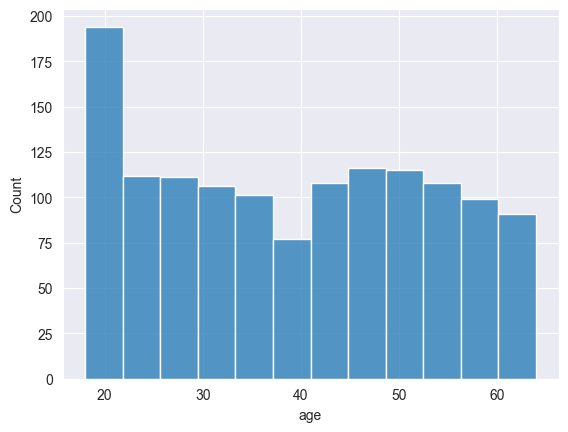

In [ ]:
# Analisando as distribuições das idades
sns.set_style("darkgrid")
plt.tight_layout()

sns.histplot(data=df_seguro, x='age' )

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='bmi', ylabel='Count'>

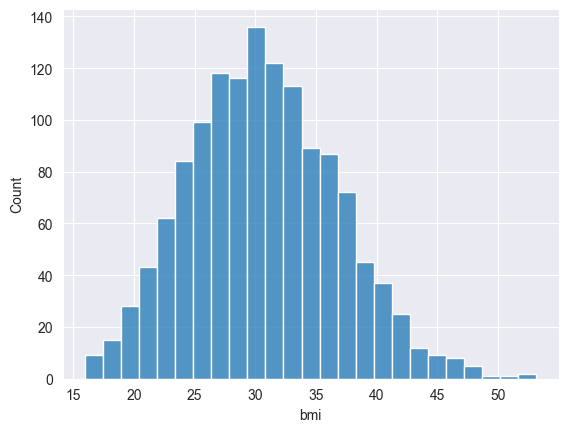

In [ ]:
# Analisando as distribuições do índice de massa corporal, onde temos uma distribuição normal
sns.set_style("darkgrid")
plt.tight_layout()

sns.histplot(data=df_seguro, x='bmi')

<Axes: xlabel='children', ylabel='count'>

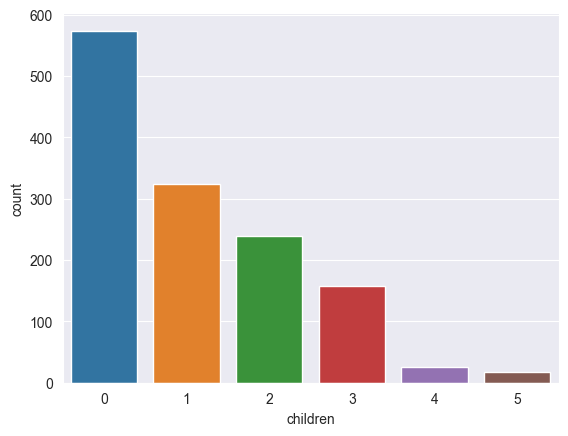

In [ ]:
# Analisando as quantidades de crianças, onde a maioria não tem filhos, ou tem até 2 filhos
sns.set_style("darkgrid")
plt.tight_layout()

sns.countplot(data=df_seguro, x='children')


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='charges', ylabel='Count'>

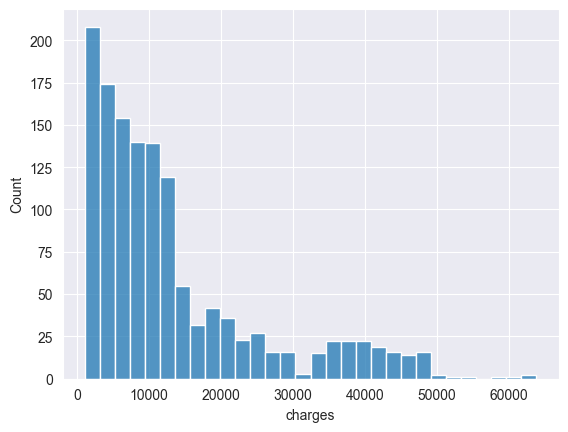

In [40]:
# Analisando a variável target: valor do seguro
sns.histplot(data=df_seguro['charges'])

## <a> Relação entre as features e a variável target </a>

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

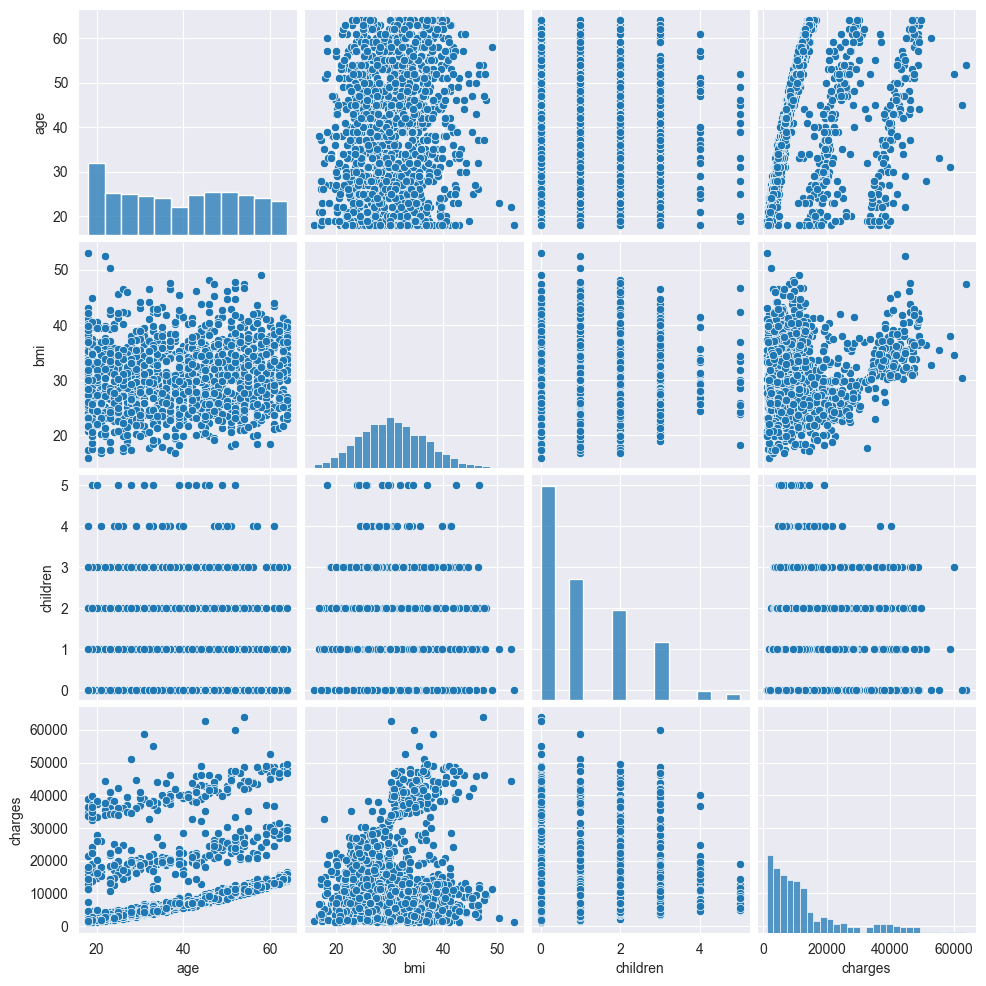

In [ ]:
sns.pairplot(data=df_seguro)

Fica evidente uma correlação positiva entre idade e as cobranças de planos de saúde (age x charges). Provavelmente será uma variável de importância no modelo preditivo

## <a> Codificação de Variáveis Categóricas </a>

In [42]:
df_seguro.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


In [43]:
# Como somente temos variáveis nominais, vamos utilizar One Hot Encoder
# Podemos utilizar o get_dummies do pandas, ou o OneHotEncoder do scikit learn
# Para variáveis somente com duas classes (sex e smoker), podemos fazer um mapeamento direto

df_seguro['female'] = df_seguro['sex'].map({'female': 1, 'male': 0})
df_seguro['smoker'] = df_seguro['smoker'].map({'yes': 1, 'no': 0})
df_seguro.head()

,age,sex,bmi,children,smoker,region,charges,female
0,19,female,27.90,0,1,southwest,16884.92,1
1,18,male,33.77,1,0,southeast,1725.55,0
2,28,male,33.00,3,0,southeast,4449.46,0
3,33,male,22.70,0,0,northwest,21984.47,0
4,32,male,28.88,0,0,northwest,3866.86,0


In [44]:
df_seguro = df_seguro.drop('sex', axis=1)
df_seguro.head()

,age,bmi,children,smoker,region,charges,female
0,19,27.90,0,1,southwest,16884.92,1
1,18,33.77,1,0,southeast,1725.55,0
2,28,33.00,3,0,southeast,4449.46,0
3,33,22.70,0,0,northwest,21984.47,0
4,32,28.88,0,0,northwest,3866.86,0


In [45]:
df_seguro['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [46]:
# Para as regiões vamos usar OHE
colunas_regiao = pd.get_dummies(df_seguro['region'], drop_first=True)
colunas_regiao.head()

,northwest,southeast,southwest
0,False,False,True
1,False,True,False
2,False,True,False
3,True,False,False
4,True,False,False


In [47]:
# concat, concatena pandas dataframes, axis=1 ele junta colunas, axis=0 junta linhas
pd.concat([df_seguro, colunas_regiao], axis=1).head()

,age,bmi,children,smoker,region,charges,female,northwest,southeast,southwest
0,19,27.90,0,1,southwest,16884.92,1,False,False,True
1,18,33.77,1,0,southeast,1725.55,0,False,True,False
2,28,33.00,3,0,southeast,4449.46,0,False,True,False
3,33,22.70,0,0,northwest,21984.47,0,True,False,False
4,32,28.88,0,0,northwest,3866.86,0,True,False,False


In [48]:
df_seguro = pd.concat([df_seguro, colunas_regiao], axis=1)
df_seguro = df_seguro.drop('region', axis=1)
df_seguro.head()

,age,bmi,children,smoker,charges,female,northwest,southeast,southwest
0,19,27.90,0,1,16884.92,1,False,False,True
1,18,33.77,1,0,1725.55,0,False,True,False
2,28,33.00,3,0,4449.46,0,False,True,False
3,33,22.70,0,0,21984.47,0,True,False,False
4,32,28.88,0,0,3866.86,0,True,False,False


In [50]:
cols_to_map = ['smoker', 'northwest', 'southeast', 'southwest']
df_seguro[cols_to_map] = df_seguro[cols_to_map].applymap(lambda x: 1 if x else 0)

C:\Users\mileno.epifanio\AppData\Local\Temp\ipykernel_9688\94442891.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_seguro[cols_to_map] = df_seguro[cols_to_map].applymap(lambda x: 1 if x else 0)


In [52]:
df_seguro.head()

,age,bmi,children,smoker,charges,female,northwest,southeast,southwest
0,19,27.90,0,1,16884.92,1,0,0,1
1,18,33.77,1,0,1725.55,0,0,1,0
2,28,33.00,3,0,4449.46,0,0,1,0
3,33,22.70,0,0,21984.47,0,1,0,0
4,32,28.88,0,0,3866.86,0,1,0,0


## <a> Determinando quem são variáveis preditoras e variável target </a>

In [53]:
df_seguro.columns

Index(['age', 'bmi', 'children', 'smoker', 'charges', 'female', 'northwest',
       'southeast', 'southwest'],
      dtype='object')

In [54]:
X = df_seguro.drop('charges', axis=1) # tirando a variável dependente
y = df_seguro[['charges']] # extraindo a variável dependente

In [ ]:
# Variáveis preditoras
X.head()

,age,bmi,children,smoker,female,northwest,southeast,southwest
0,19,27.90,0,1,1,0,0,1
1,18,33.77,1,0,0,0,1,0
2,28,33.00,3,0,0,0,1,0
3,33,22.70,0,0,0,1,0,0
4,32,28.88,0,0,0,1,0,0


In [ ]:
# Variável dependente
y.head()

,charges
0,16884.92
1,1725.55
2,4449.46
3,21984.47
4,3866.86


## <a> Separação de bases </a>

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Devolve uma tupla com 4 elementos: X de treino, X de teste, y de treino, y de teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, # preditoras 
                                                        y, # target
                                                        test_size=.2, 
                                                        random_state=42)

X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape

((1070, 8), (268, 8), (1070, 1), (268, 1))

## <a> Feature Scaling via MinMaxScaler </a>

In [59]:
df_seguro.describe()

,age,bmi,children,smoker,charges,female,northwest,southeast,southwest
count,1338.00,1338.00,1338.00,1338.00,1338.00,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,0.20,13270.42,0.49,0.24,0.27,0.24
std,14.05,6.10,1.21,0.40,12110.01,0.50,0.43,0.45,0.43
min,18.00,15.96,0.00,0.00,1121.87,0.00,0.00,0.00,0.00
25%,27.00,26.30,0.00,0.00,4740.29,0.00,0.00,0.00,0.00
50%,39.00,30.40,1.00,0.00,9382.03,0.00,0.00,0.00,0.00
75%,51.00,34.69,2.00,0.00,16639.91,1.00,0.00,1.00,0.00
max,64.00,53.13,5.00,1.00,63770.43,1.00,1.00,1.00,1.00


In [ ]:
# Normalização - MinMaxScaler, Padronização - StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [61]:
type(scaler)

sklearn.preprocessing._data.MinMaxScaler

In [62]:
scaler

MinMaxScaler()

In [ ]:
colunas = X_treino.columns

# Fit no treino! Transform no treino e teste
X_treino[colunas] = scaler.fit_transform(X_treino)
X_teste[colunas] = scaler.transform(X_teste)

X_treino.shape, X_teste.shape

((1070, 8), (268, 8))

In [64]:
X_treino.head()

,age,bmi,children,smoker,female,northwest,southeast,southwest
560,0.61,0.11,0.40,0.00,1.00,1.00,0.00,0.00
1285,0.63,0.22,0.00,0.00,1.00,0.00,0.00,0.00
1142,0.74,0.24,0.00,0.00,1.00,0.00,1.00,0.00
969,0.46,0.49,1.00,0.00,1.00,0.00,1.00,0.00
486,0.78,0.15,0.60,0.00,1.00,1.00,0.00,0.00


In [65]:
X_treino.describe()

,age,bmi,children,smoker,female,northwest,southeast,southwest
count,1070.00,1070.00,1070.00,1070.00,1070.00,1070.00,1070.00,1070.00
mean,0.46,0.39,0.22,0.21,0.49,0.24,0.26,0.25
std,0.31,0.16,0.24,0.40,0.50,0.43,0.44,0.43
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.20,0.28,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.47,0.38,0.20,0.00,0.00,0.00,0.00,0.00
75%,0.72,0.50,0.40,0.00,1.00,0.00,1.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [67]:
X_teste.describe()

,age,bmi,children,smoker,female,northwest,southeast,southwest
count,268.00,268.00,268.00,268.00,268.00,268.00,268.00,268.00
mean,0.45,0.41,0.21,0.20,0.52,0.26,0.30,0.23
std,0.30,0.17,0.23,0.40,0.50,0.44,0.46,0.42
min,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.17,0.29,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.43,0.40,0.20,0.00,1.00,0.00,0.00,0.00
75%,0.70,0.52,0.40,0.00,1.00,1.00,1.00,0.00
max,1.00,0.99,1.00,1.00,1.00,1.00,1.00,1.00


## <a> Analisando a correlação entre variáveis </a>

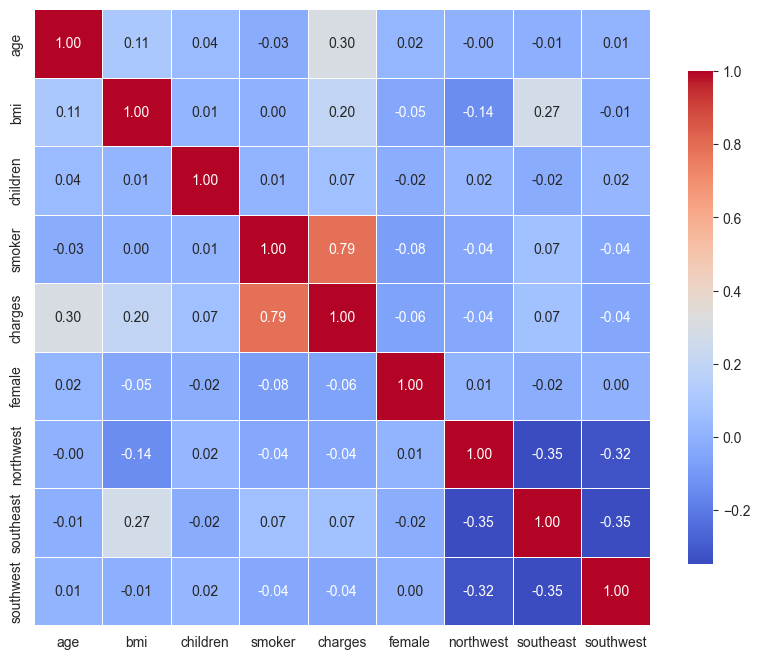

In [ ]:
figura, graficos = plt.subplots(figsize=(10, 8))
corr = df_seguro.corr()

sns.heatmap(corr, 
            mask=np.zeros_like(corr, dtype=bool), 
            square=True, 
            ax=graficos, 
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            linewidths=0.5,
            cbar_kws={"shrink": 0.8})
plt.show()

## <a> Treinamento do modelo</a>

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [ ]:
regressao_linear = LinearRegression()

# Vamos treinar utilizando cross validation
valores_rmse_rl = cross_val_score(estimator=regressao_linear, 
                                  X=X_treino, 
                                  y=y_treino, 
                                  cv=10, # 10-fold CV
                                  scoring='neg_root_mean_squared_error')
valores_rmse_rl

array([-6073.99997254, -6580.87166754, -5233.82683473, -6045.25239632,
       -5836.4647871 , -6127.43525895, -7281.08373608, -6321.52706355,
       -6193.3145481 , -5637.06299714])

In [75]:
len(valores_rmse_rl)

10

In [76]:
valores_rmse_rl = valores_rmse_rl * -1
valores_rmse_rl

array([6073.99997254, 6580.87166754, 5233.82683473, 6045.25239632,
       5836.4647871 , 6127.43525895, 7281.08373608, 6321.52706355,
       6193.3145481 , 5637.06299714])

In [77]:
media_rmse_rl = valores_rmse_rl.mean()
media_rmse_rl

6133.0839262055

### Tentando via árvore de regressão?

In [ ]:
from sklearn.tree import DecisionTreeRegressor

arvore_regressao = DecisionTreeRegressor()

valores_rmse_arvore = cross_val_score(estimator=arvore_regressao, 
                                      X=X_treino, 
                                      y=y_treino, 
                                      cv=10, # 
                                  scoring='neg_root_mean_squared_error')
valores_rmse_arvore

array([-6184.9446898 , -7688.18940205, -6585.54245548, -6618.31001829,
       -7460.72316551, -5841.81192174, -7082.88704792, -7199.2147005 ,
       -6638.40897201, -5972.68395896])

In [80]:
valores_rmse_arvore = valores_rmse_arvore * -1
valores_rmse_arvore

array([6184.9446898 , 7688.18940205, 6585.54245548, 6618.31001829,
       7460.72316551, 5841.81192174, 7082.88704792, 7199.2147005 ,
       6638.40897201, 5972.68395896])

In [81]:
media_rmse_arvore = valores_rmse_arvore.mean()
media_rmse_arvore

6727.271633226066

### E se retiramos as colunas de regiões. Na análise de correlação elas não mostraram muita influência na variável target

In [44]:
X_treino.columns

Index(['age', 'bmi', 'children', 'smoker', 'female', 'northwest', 'southeast',
       'southwest'],
      dtype='object')

In [ ]:
colunas_regiao = ['northwest', 'southeast', 'southwest']
valores_rmse_rl_sem_regiao = cross_val_score(estimator=regressao_linear, 
                                             X=X_treino.drop(colunas_regiao, axis=1), 
                                             y=y_treino, 
                                             cv=10, 
                                      scoring='neg_root_mean_squared_error')
valores_rmse_rl_sem_regiao.mean() * -1

6121.545062597131

In [83]:
valores_rmse_rl_sem_regiao = valores_rmse_rl_sem_regiao * -1

In [ ]:

colunas_regiao = ['northwest', 'southeast', 'southwest']
valores_rmse_arvore_sem_regiao = cross_val_score(estimator=arvore_regressao, 
                                                 X=X_treino.drop(colunas_regiao, axis=1), 
                                                 y=y_treino, cv=10, 
                                      scoring='neg_root_mean_squared_error')
valores_rmse_arvore_sem_regiao.mean() * -1

6899.789595823761

In [86]:
valores_rmse_arvore_sem_regiao = valores_rmse_arvore_sem_regiao * -1

Text(0.5, 1.0, 'Comparação de RMSE')

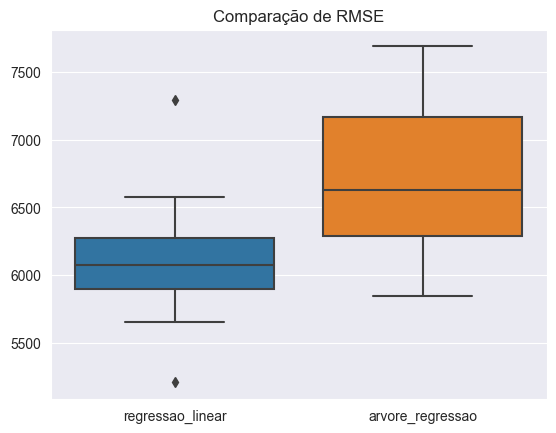

In [87]:
rmse = pd.DataFrame({'regressao_linear': valores_rmse_rl_sem_regiao, 'arvore_regressao': valores_rmse_arvore})

sns.boxplot(data=rmse).set_title("Comparação de RMSE")

## <a> Modelo Campeão: Regressão Linear </a>

In [88]:
regressao_linear.fit(X_treino.drop(colunas_regiao, axis=1), y_treino)

LinearRegression()

In [89]:
regressao_linear.coef_

array([[1.18251723e+04, 1.21744207e+04, 2.13627215e+03, 2.36539033e+04,
        7.95178837e+00]])

In [90]:
df_coeficientes = pd.DataFrame(regressao_linear.coef_)
df_coeficientes.columns=regressao_linear.feature_names_in_
df_coeficientes

,age,bmi,children,smoker,female
0,11825.17,12174.42,2136.27,23653.90,7.95


In [ ]:
#!pip install statsmodels

In [91]:
# Extra: podemos calcular o p-valor dos coeficientes de cada regressão utilizando o pacote statsmodels
import statsmodels.api as sm

rl_statsmodels = sm.OLS(y_treino,X_treino.drop(colunas_regiao, axis=1))
resultado_fit = rl_statsmodels.fit()
p_valores = resultado_fit.summary2().tables[1]['P>|t|']
p_valores

age        0.00
bmi        0.00
children   0.07
smoker     0.00
female     0.21
Name: P>|t|, dtype: float64

Agora que temos nosso modelo final, podemos fazer inferências dos valores do plano de saúde no teste. Percebam que nunca utilizamos o teste PARA NADA, como deve ser.

In [ ]:
# estimador é treinado com fit
# estimador prediz com predict
precos_preditos = regressao_linear.predict(X_teste.drop(colunas_regiao, axis=1))
precos_preditos[:5]

array([[ 8554.81711589],
       [ 6973.58746745],
       [36798.60416104],
       [ 9417.88282303],
       [26871.68031081]])

In [93]:
len(precos_preditos)

268

In [94]:
y_teste.head()

,charges
764,9095.07
887,5272.18
890,29330.98
1293,9301.89
259,33750.29


In [57]:
predicoes_vs_real = pd.DataFrame({'predicao': precos_preditos.flatten(), 'real': y_teste.values.flatten()})
predicoes_vs_real['diferenca_abs'] = abs(predicoes_vs_real['predicao'] - predicoes_vs_real['real'])
predicoes_vs_real.head(20)

,predicao,real,diferenca_abs
0,8554.82,9095.07,540.25
1,6973.59,5272.18,1701.41
2,36798.60,29330.98,7467.62
3,9417.88,9301.89,115.99
4,26871.68,33750.29,6878.61
5,11097.38,4536.26,6561.12
6,145.28,2117.34,1972.06
7,16746.17,14210.54,2535.63
8,747.53,3732.63,2985.09
9,11153.68,10264.44,889.23


In [95]:
# Tudo muito bem, tudo muito bom. Mas será que uma simples média é melhor do 
# que nosso modelo? Vamos testar o r quadrado
from sklearn.metrics import r2_score

r2_score(y_true=y_teste, y_pred=precos_preditos)

0.7811302113434095

Até que 0,78 não é ruim, nosso modelo explica bastante a variável target

#### Quer testar uma predição com inputs?

In [112]:
X_teste.drop(colunas_regiao, axis=1).columns

Index(['age', 'bmi', 'children', 'smoker', 'female'], dtype='object')

In [113]:
idade = input()

In [114]:
indice_massa_corporal = input()

In [115]:
criancas = input()

In [116]:
fumante = input("1 para fumante, 0 para não fumante: ")

In [117]:
sexo = input("1 para mulher, 0 para homem: ")

In [118]:
idade, indice_massa_corporal, criancas, fumante, sexo

('27', '43', '0', '0', '0')

In [ ]:
features = [[idade, indice_massa_corporal, criancas, fumante, sexo, 1, 1, 1]]

features = scaler.transform(features)
features

C:\Users\mileno.epifanio\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.19565217, 0.72746839, 0.        , 0.        , 0.        ,
        1.        , 1.        , 1.        ]])

In [ ]:

features = features[:,:-3]
features

array([[0.19565217, 0.72746839, 0.        , 0.        , 0.        ]])

In [ ]:
regressao_linear.predict(features)

C:\Users\mileno.epifanio\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[8903.40002428]])